## Observations and Insights 

GIAM'S OBSERVATIONS AND INSIGHTS

1.  From the line graph in the "Lines and Scatter Plots" section:  

Under the Capomulin treatment, the tumor volume for Mouse x401, decreased significantly, suggesting Capomulin was effective in reducing the tumor.

2.  From the 'scatter with line regression graph' in the "Correlation and Regression" section:

Under the Capomulin treatment, mouse weight increased as the Tumor Volume increased.

3.  From the 'scatter with line regression graph' in the "Correlation and Regression" section:

The strength and direction of the regression line resulted in an R-value of 0.7088568047708717, which is considered a strong correlation. This suggests there is a strong relationship between Tumor Volume and Mouse weight for Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_results = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="left")

# Display the data table for preview
merged_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_uniques = merged_results['Mouse ID'].nunique() 
print(f"There are", mouse_uniques, "unique mice in the merged data frame.") 

There are 249 unique mice in the merged data frame.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_results = merged_results[merged_results.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on Mouse ID & Timepoint are:",duplicate_results['Mouse ID'], sep='\n') 

Duplicate Rows based on Mouse ID & Timepoint are:
909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows based on Mouse ID & Timepoint are:",duplicate_results, sep='\n')

Duplicate Rows based on Mouse ID & Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = merged_results.loc[merged_results["Mouse ID"] != "g989"]
clean_results 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_uniques = clean_results['Mouse ID'].nunique() 

print(f"After removing the duplicate mouse 'g989', there are", clean_mice_uniques, "unique mice in the clean data frame.") 

After removing the duplicate mouse 'g989', there are 248 unique mice in the clean data frame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Define new DF by 2 columns
regim_tv_stats = clean_results[['Drug Regimen', 'Tumor Volume (mm3)']]

# Calculate Tumor Volume stats by grouped Drug Regimen
regimen_mean = regim_tv_stats.groupby("Drug Regimen").mean()
regimen_med = regim_tv_stats.groupby("Drug Regimen").median()
regimen_var = regim_tv_stats.groupby("Drug Regimen").var()
regimen_sd = regim_tv_stats.groupby("Drug Regimen").std()
regimen_sem = regim_tv_stats.groupby("Drug Regimen").sem()

#Merge each df into one df
merge_mean_med = pd.merge(regimen_mean, regimen_med, on="Drug Regimen", how="outer")
merge_mean_med_var = pd.merge(merge_mean_med, regimen_var, on="Drug Regimen", how="outer")
merge_mean_med_var_sd = pd.merge(merge_mean_med_var, regimen_sd, on="Drug Regimen", how="outer")
merge_stats_table = pd.merge(merge_mean_med_var_sd, regimen_sem, on="Drug Regimen", how="outer")

# Rename dataframe columns
merge_stats_table.columns = ['Tumor Vol (mm3) Mean','Tumor Vol (mm3) Median','Tumor Vol (mm3) Variance',
                             'Tumor Vol (mm3) Std Dev','Tumor Vol (mm3) SEM']

# Show table
merge_stats_table

,Tumor Vol (mm3) Mean,Tumor Vol (mm3) Median,Tumor Vol (mm3) Variance,Tumor Vol (mm3) Std Dev,Tumor Vol (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = clean_results.groupby('Drug Regimen').agg({
   'Tumor Volume (mm3)' :['mean', 'median', 'var', 'std','sem']
})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

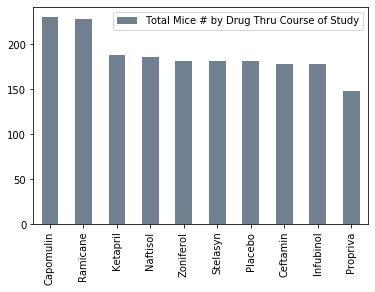

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# summary_table.plot.hist()
data = clean_results['Drug Regimen'].value_counts()
pandas_bar = pd.DataFrame(data)
pandas_bar.columns = ['Total Mice # by Drug Thru Course of Study']
pandas_bar = pandas_bar.plot.bar(color ={"slategrey"})

Text(0, 0.5, 'Number of Mice over all Timepoints')

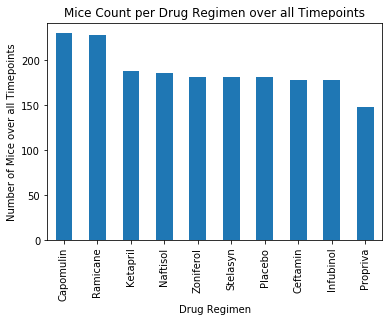

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
clean_results['Drug Regimen'].value_counts().plot(kind="bar")
plt.title("Total Number of Mice for Each Treatment Throughout the Course of the Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice over all Timepoints")

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

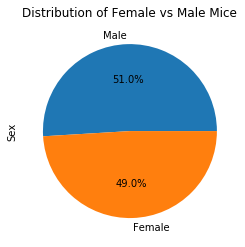

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_results["Sex"].value_counts()
gender_count.plot(kind='pie', labels = gender_count.index.values, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")

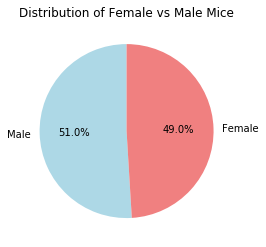

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors =['lightblue','lightcoral']
plt.pie(gender_count.values, labels=gender_count.index, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Finds the last timepoint for each grouped Mouse from the clean df with 2 cols: Mouse ID & Timepoint
last_tp = clean_results.groupby('Mouse ID')['Timepoint'].max().reset_index() #.reset_index() puts the results into a new df

#Merge "last_tp" df with the original "clean" df to get the tumor volume at the last timepoint
last_tp_merge = clean_results.merge(last_tp, on=['Mouse ID', 'Timepoint'])
 
# Limit the list to the 4 regimens
filtered_last_tp_merge = last_tp_merge[
    (last_tp_merge['Drug Regimen'] == 'Capomulin') | 
    (last_tp_merge['Drug Regimen'] == 'Ramicane')| 
    (last_tp_merge['Drug Regimen'] == 'Infubinol')| 
    (last_tp_merge['Drug Regimen'] == 'Ceftamin')
]
# Delivers the final tumor volume of each mouse across the four treatment regimens 
## Should be 100 rows: Of the original 1880 rows (with 13 g989 mice rows removed), 
    ## there are 814 rows with only the 4 drug regimens (out of 10) filtered. 
    ## Of the 814,there are only 100 rows with the final Timepoint filtered.
filtered_last_tp_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:
    new = filtered_last_tp_merge.loc[filtered_last_tp_merge["Drug Regimen"] == treatment] ['Tumor Volume (mm3)']
    quartiles = new.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = higherq + (1.5 * iqr)
    print(f"Outlier for {treatment} : {new.loc[(new<lower_bound) | (new > upper_bound)]}")    

Outlier for Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier for Infubinol : 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outlier for Ceftamin : Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Final Tumor Volume of Each Mouse')

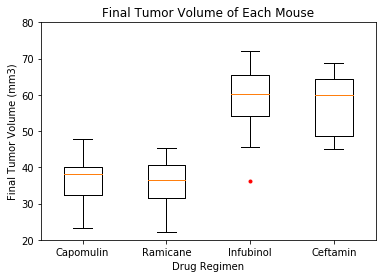

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = filtered_last_tp_merge.loc[filtered_last_tp_merge["Drug Regimen"] == "Capomulin"] ['Tumor Volume (mm3)']
Ramicane = filtered_last_tp_merge.loc[filtered_last_tp_merge["Drug Regimen"] == "Ramicane"] ['Tumor Volume (mm3)']
Infubinol = filtered_last_tp_merge.loc[filtered_last_tp_merge["Drug Regimen"] == "Infubinol"] ['Tumor Volume (mm3)']
Ceftamin = filtered_last_tp_merge.loc[filtered_last_tp_merge["Drug Regimen"] == "Ceftamin"] ['Tumor Volume (mm3)']

plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin], labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"],sym="r.")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.ylim(20, 80)
plt.title("Final Tumor Volume of Each Mouse")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Mouse x401 - Time Point vs Tumor Volume')

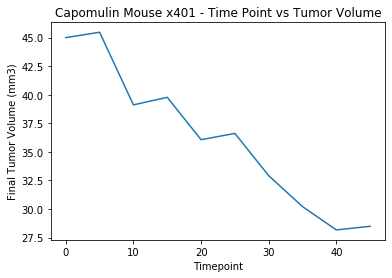

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin"]
Mouse_401 = Capomulin.loc[Capomulin["Mouse ID"] == "x401"]
plt.plot(Mouse_401["Timepoint"],Mouse_401["Tumor Volume (mm3)"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Capomulin Mouse x401 - Time Point vs Tumor Volume")

Text(0.5, 1.0, 'Mouse Weight Versus Average Tumor Volume for Capomulin')

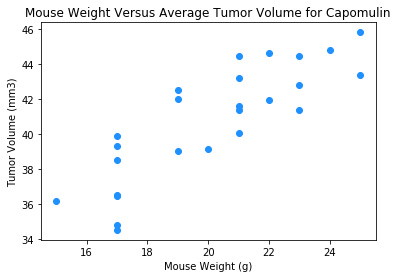

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Isolating Capomulin
tumor_vol_df = clean_results.loc[clean_results['Drug Regimen'] == 'Capomulin']

#grouping Mice and averaging
avg_tumor_volume = tumor_vol_df.groupby("Mouse ID").mean()

#plotting and formatting scatter
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume for Capomulin")

## Correlation and Regression

R Val is 0.7088568047708717


Text(20, 35, 'y = 0.95x + 21.55')

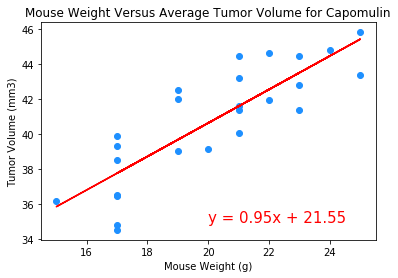

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Isolating Capomulin
tumor_vol_df = clean_results.loc[clean_results['Drug Regimen'] == 'Capomulin']

#grouping Mice and averaging
avg_tumor_volume = tumor_vol_df.groupby("Mouse ID").mean()

#plotting and formatting scatter
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker="o", facecolors="dodgerblue")

#inserting chart labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume for Capomulin")

#defining values
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(20,35),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing